In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns

In [24]:
data = pd.read_csv('Data/pima-indians-diabetes.csv')
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


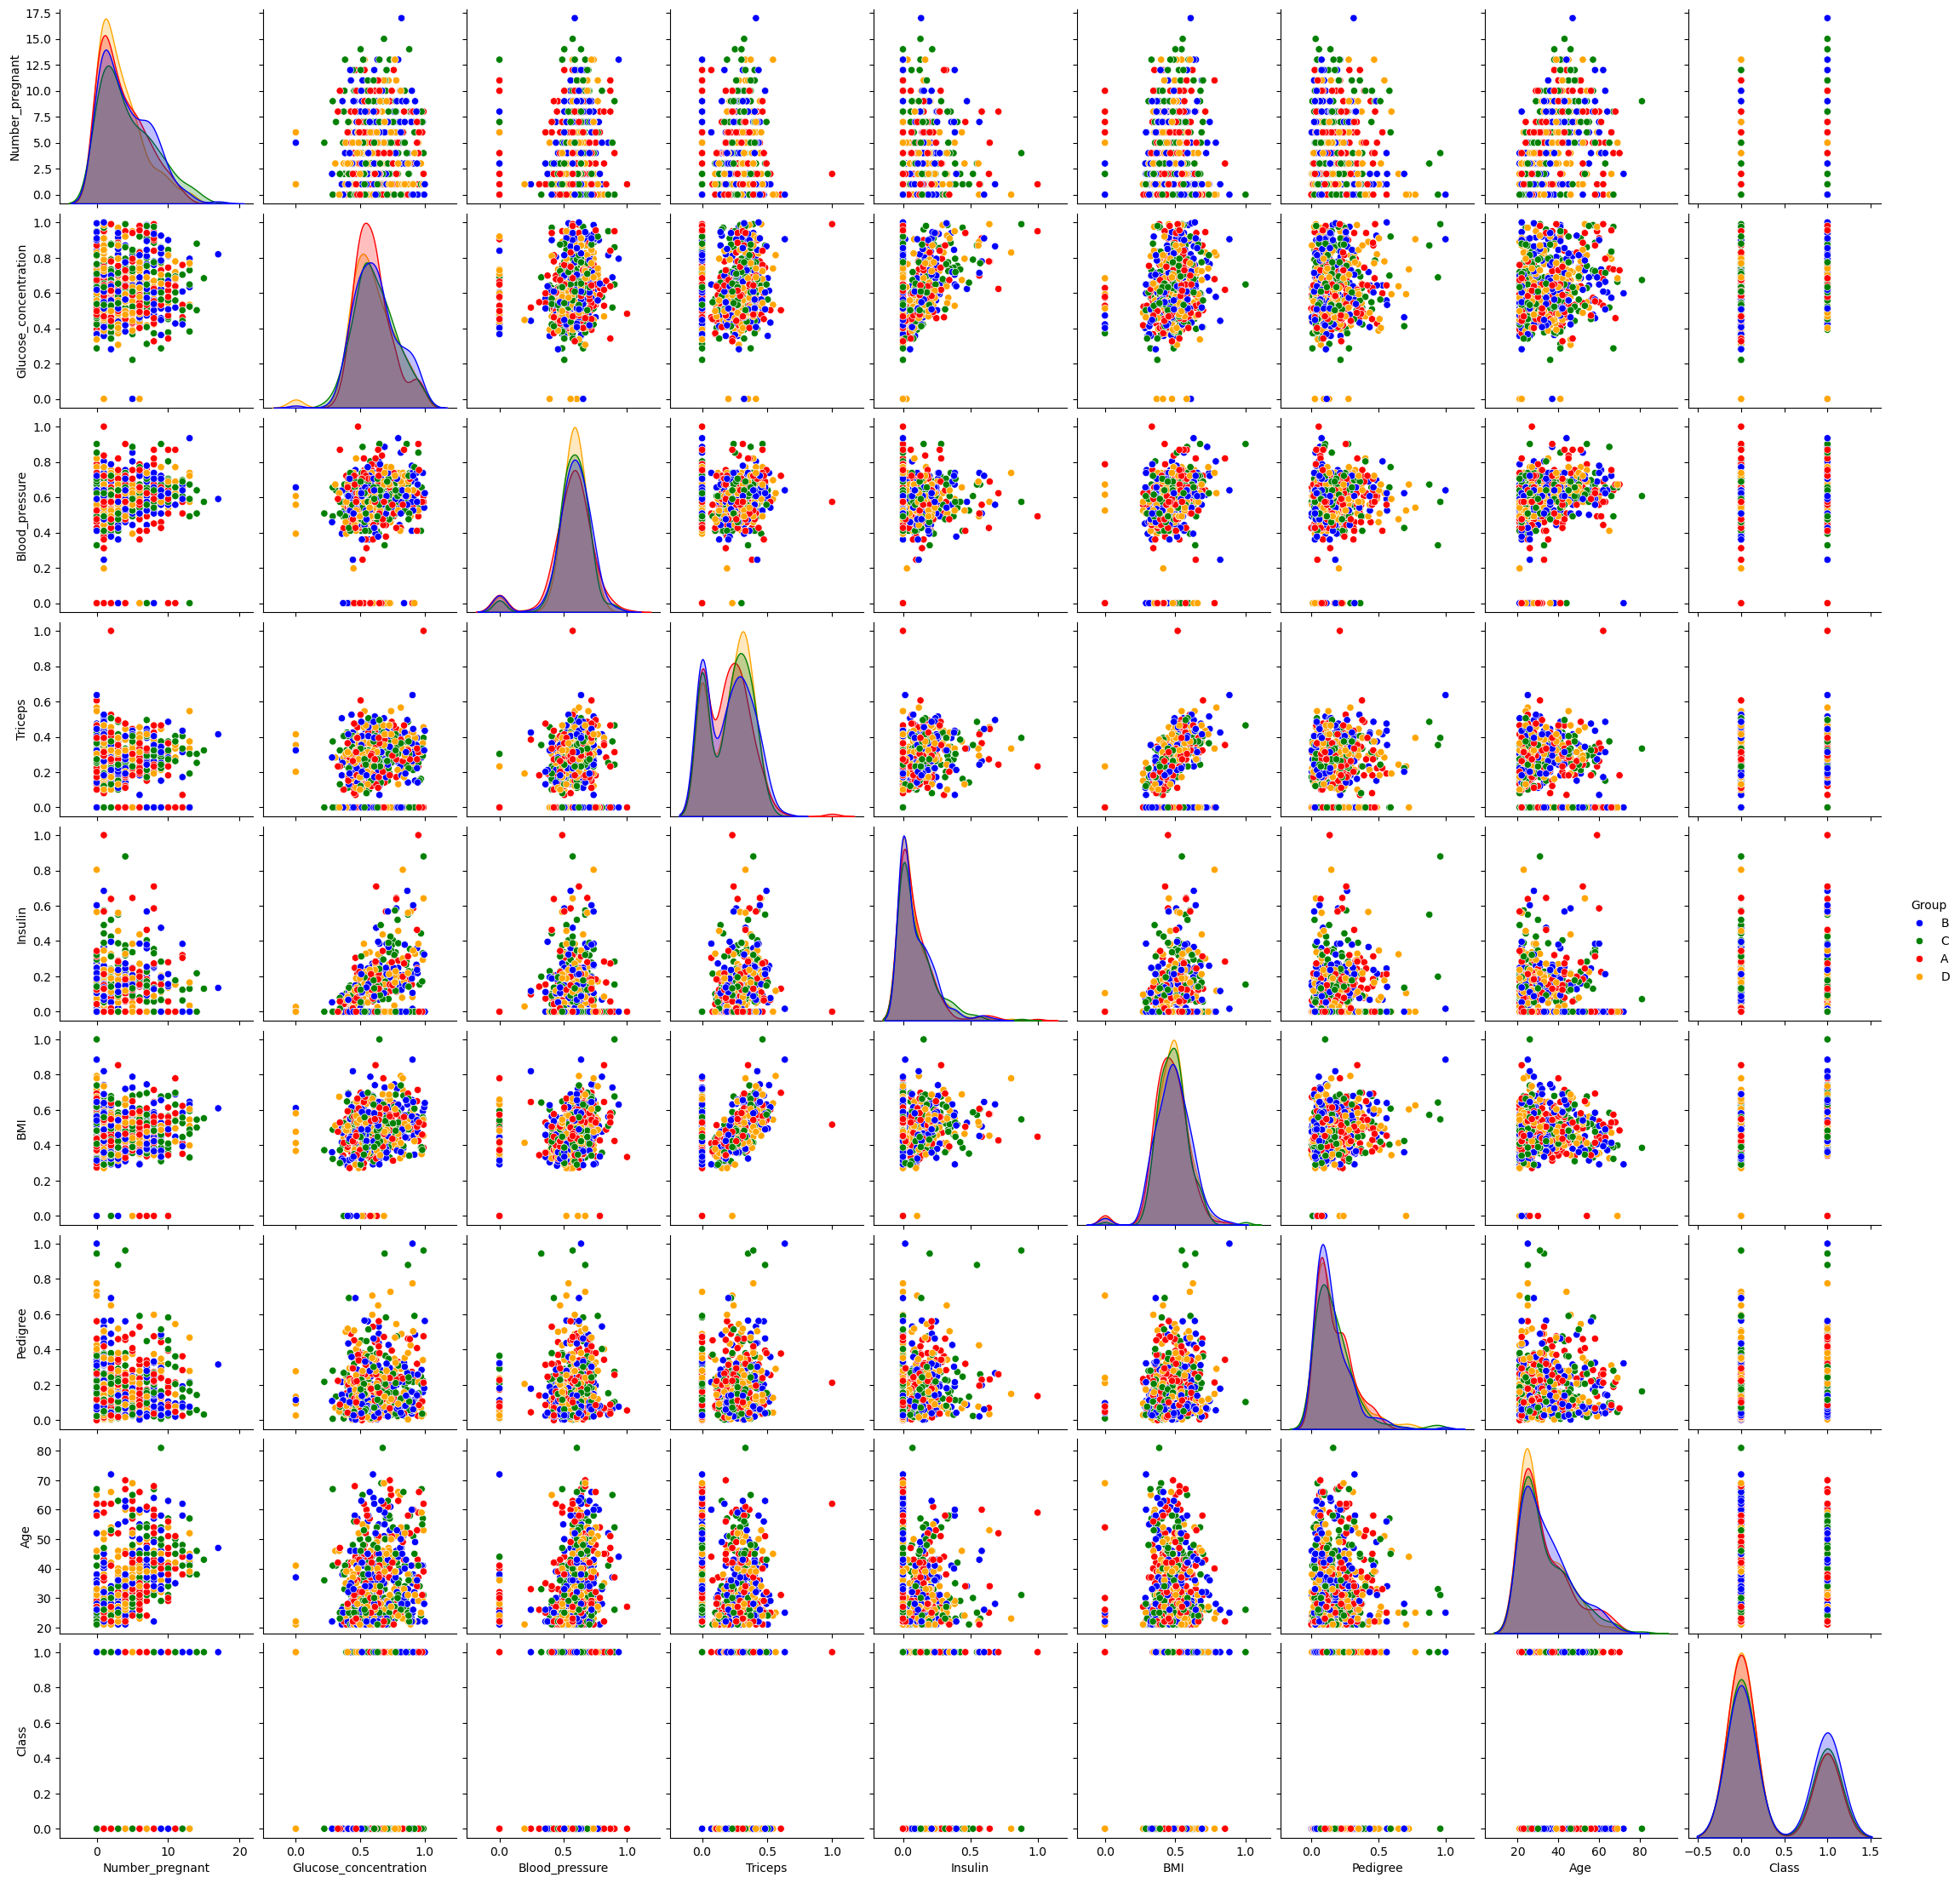

In [23]:
# Plot the data by variables
# The pairplot function creates its own figure, so plt.figure() is not needed here.
# Use the 'hue' parameter to separate data by the 'Class' column.
# Use the 'palette' parameter to assign specific colors to each class.
sns.pairplot(data, hue='Group', diag_kind='kde', palette={'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'})
plt.show()

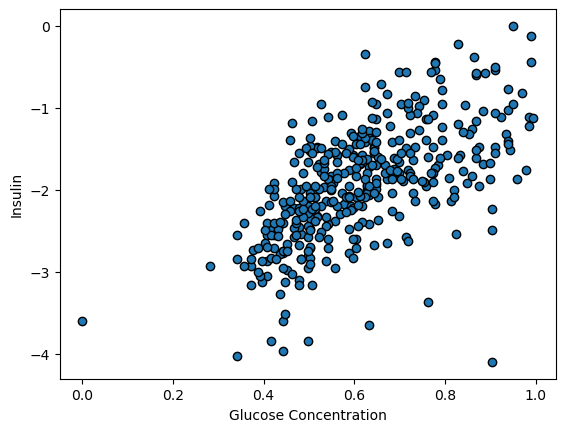

In [33]:
insulin = data['Insulin'][data['Insulin']>0].values
glucose = data['Glucose_concentration'][data['Insulin']>0].values

new_data = pd.DataFrame({'Glucose': glucose, 'Insulin': insulin})

plt.scatter(x=glucose, y=np.log(insulin), edgecolors='k')
plt.xlabel('Glucose Concentration')
plt.ylabel('Insulin')
plt.show()  

Model Coefficients:
Theta 0: 0.5618079271714904


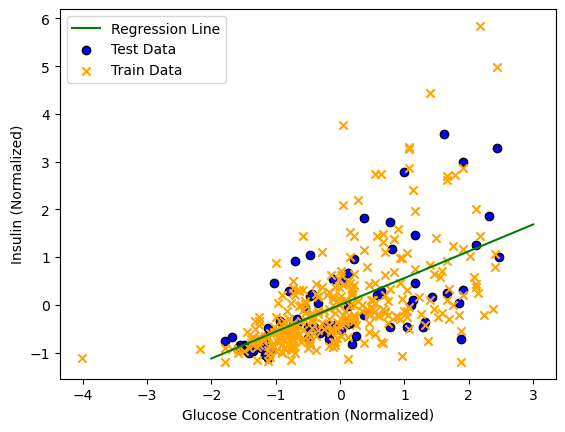

In [54]:
# Ajustar un modelo de regresión lineal
# ... (código para ajustar el modelo)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

normal_train = (train_data - train_data.mean()) / train_data.std()
normal_test = (test_data - train_data.mean()) / train_data.std()

model = LinearRegression()
model.fit(normal_train[['Glucose']], normal_train['Insulin'])

predictions = model.predict(normal_test[['Glucose']])

print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f'Theta {i}: {coef}')

plt.plot(np.linspace(-2, 3, 100), model.intercept_ + model.coef_[0] * np.linspace(-2, 3, 100), c='green', label='Regression Line')

plt.scatter(normal_test['Glucose'], normal_test['Insulin'], c='blue', label='Test Data', edgecolors='k')
plt.scatter(normal_train['Glucose'], normal_train['Insulin'], c='orange', marker='x', label='Train Data')
plt.xlabel('Glucose Concentration (Normalized)')
plt.ylabel('Insulin (Normalized)')
plt.legend()
plt.show()